# Appendix - Python Code and Outputs

### Data Preparation

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Import Extracted Training Data

In [2]:
import numpy as np
import pandas as pd
# load training data
disaster_training_data = pd.read_csv('train.csv')

# show first rows of the data
disaster_training_data.head(10)

# show number of columns and rows
disaster_training_data.shape

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


(7613, 5)

In [3]:
# drop id column from training data
disaster_training_data.drop(columns = 'id', inplace=True)

# show first ten rows
disaster_training_data.head(10)

,keyword,location,text,target
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,NaN,NaN,There's an emergency evacuation happening now ...,1
9,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


### Investigation of Missing Data and Outliers in Training Data

In [4]:
# find null counts, percentage of null values, and column type
null_count = disaster_training_data.isnull().sum()
null_percentage = disaster_training_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
location,2533,33.272035,object
keyword,61,0.801261,object


The above analysis displays that location is missing from 2533 rows and keyword is missing from 61 rows in the training data.

In [5]:
# deal with missing values

# fill missing keyword with unknown
disaster_training_data['keyword'].fillna('unknown', inplace=True)

# fill missing location with unknown
disaster_training_data['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
disaster_training_data['text'] = disaster_training_data['text'] + ' ' + disaster_training_data['keyword']+ ' ' + disaster_training_data['location']

# find null counts, percentage of null values, and column type
null_count = disaster_training_data.isnull().sum()
null_percentage = disaster_training_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_training_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


### Import Testing Data

In [6]:
# import test dataset
disaster_testing_data = pd.read_csv('test.csv')

# show first ten rows of the data
disaster_testing_data.head(10)

# show number of columns and rows
disaster_testing_data.shape

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


(3263, 4)

### Investigation of Missing Data and Outliers in Testing Data

In [7]:
# find null counts, percentage of null values, and column type
null_count = disaster_testing_data.isnull().sum()
null_percentage = disaster_testing_data.isnull().sum() * 100 / len(disaster_testing_data)
column_type = disaster_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type
location,1105,33.864542,object
keyword,26,0.796813,object


The above analysis displays that location is missing from 1105 rows and keyword is missing from 26 rows in the testing data.

In [8]:
# deal with missing values

# fill missing keyword with unknown
disaster_testing_data['keyword'].fillna('unknown', inplace=True)

# fill missing location with unknown
disaster_testing_data['location'].fillna('unknown', inplace=True)

# add keyword and location to tweets
disaster_testing_data['text'] = disaster_testing_data['text'] + ' ' + disaster_testing_data['keyword']+ ' ' + disaster_testing_data['location']

# find null counts, percentage of null values, and column type
null_count = disaster_testing_data.isnull().sum()
null_percentage = disaster_testing_data.isnull().sum() * 100 / len(disaster_training_data)
column_type = disaster_testing_data.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

,Missing Count,Percentage Missing,Column Type


### Plot target counts

[Text(0.5, 1.0, 'Target Groups')]

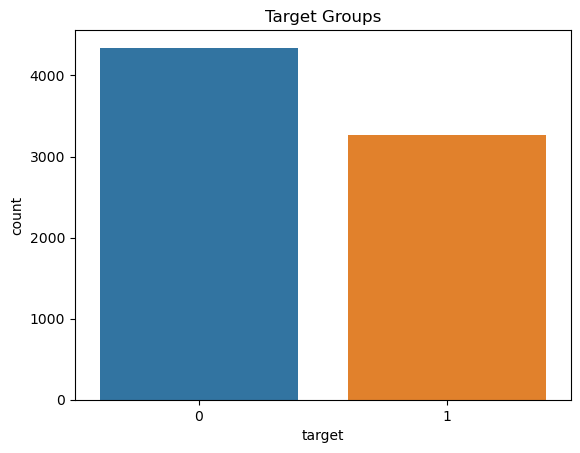

In [9]:
import seaborn as sns
import plotly as plt
sns.countplot(x='target', data=disaster_training_data).set(title = 'Target Groups')

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Embedding, GRU, Bidirectional, GlobalMaxPooling1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint

In [11]:
# extract tweet label
tweet_label = disaster_training_data['target']

# convert to numpy array
tweet_label = np.array(tweet_label)
tweet_label = tweet_label.reshape(-1)

# extract tweet text
tweet_text = disaster_training_data['text']

# convert to numpy array
tweet_text = np.array(tweet_text)
print(tweet_text[1])

# reshape tweet text to rank 1 for TextVectorization
tweet_text = tf.reshape(tweet_text, (-1, 1))

# encode text using TextVecorization
text_vec_layer = tf.keras.layers.TextVectorization(split="character",
                                                   standardize="lower")
text_vec_layer.adapt([tweet_text])
encoded = text_vec_layer([tweet_text])[0]

Forest fire near La Ronge Sask. Canada unknown unknown


In [12]:
# number of distinct characters
n_tokens = text_vec_layer.vocabulary_size() - 2
print(n_tokens)

# drop tokens 0 (pad) and 1 (unknown)
encoded -= 2

# total number of chars
dataset_size = len(encoded) 
print(dataset_size)

106
7613


In [13]:
from sklearn.model_selection import train_test_split
# extract tweet label
tweet_text = disaster_training_data['text']

# convert to numpy array
tweet_text = np.array(tweet_text)
tweet_text = tweet_text.reshape(-1)

# extract tweet text
X_train, X_valid, y_train, y_valid = train_test_split(tweet_text, tweet_label, test_size=0.2, random_state=10)

In [14]:
# Build Initial Sequential Model
model = Sequential()
# 2D convolutional layer w/64 filters, 5x5 kernel, and ReLU activation function. Model expects 150x150 image with 3 channels.
model.add(Embedding(input_dim=n_tokens, output_dim=100, input_length=100))

# max pooling layer
model.add(GRU(units=128, return_sequences=True))

model.add(GlobalMaxPooling1D())

# We add a dense hidden layer:
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.5))

# # project onto a single unit output layer, and use sigmoid activation func
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          10600     
                                                                 
 gru (GRU)                   (None, 100, 128)          88320     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

2023-05-24 21:36:59.958603: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-24 21:36:59.960857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-24 21:36:59.962440: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [ ]:
# Adam solver optimizer with learning rate of 0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("NLP_model", monitor="val_accuracy", save_best_only=True)

# fit the model
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=10, callbacks=[model_checkpoint], batch_size=32)

^ COMMENT: We should evaluate an F score in lieu of accuracy for these type of analysis.

## Model 2:

### Preprocessing

In [124]:
# load training data
model2_train_df = pd.read_csv('train.csv')

# Drop the LOCATION column from the copy of the training dataframe
model2_train_df.drop(['location'], axis=1, inplace=True)

# Drop the KEYWORD column from the copy of the training dataframe
model2_train_df.drop(['keyword'], axis=1, inplace=True)

# Create a copy of the testing dataframe
model2_test_df = pd.read_csv('test.csv')

# Drop the LOCATION column from the copy of the testing dataframe
model2_test_df.drop(['location'], axis=1, inplace=True)

# Drop the KEYWORD column from the copy of the testing dataframe
model2_test_df.drop(['keyword'], axis=1, inplace=True)

Given that there is missingness in location, it was deleted

In [125]:
# fill missing keyword with a space
#model2_train_df['keyword'].fillna(' ', inplace=True)

# add keyword to tweets
#model2_train_df['text'] = model2_train_df['text'] + ' ' + model2_train_df['keyword']

#Drop the keyword column now that it was appended
#model2_test_df.drop(['keyword'], axis=1, inplace=True)

# Designate the ID column as the main index column
model2_train_df = model2_train_df.set_index('id', verify_integrity=True)

# Designate the ID column as the main index column
model2_test_df = model2_test_df.set_index('id', verify_integrity=True)

,text,target
id,,
1,Our Deeds are the Reason of this #earthquake M...,1
4,Forest fire near La Ronge Sask. Canada,1
5,All residents asked to 'shelter in place' are ...,1
6,"13,000 people receive #wildfires evacuation or...",1
7,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
pip uninstall tweet-preprocessor

In [ ]:
pip uninstall preprocessor

In [1]:
pip install tweet-preprocessor

Note: you may need to restart the kernel to use updated packages.


In [1]:
from wordsegment import load, segment

import re, glob, datetime

import preprocessor as pre

# Help with memory issues
import gc

import unicodedata2

# Tools for LDA
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mhurt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhurt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load segmentation dictionary
load()

# Set options for Twitter processing - remove url, mention, and emojis
pre.set_options(pre.OPT.URL, pre.OPT.EMOJI, pre.OPT.MENTION, pre.OPT.SMILEY)

# Hash fix - will be called from within tweet cleaning function
def hash_fix(h):
    h1 = re.sub(r'[0-9]+', '', h)
    h2 = re.sub(r'#', '', h1)
    h3 = segment(str(h2))
    h4 = ' '.join(map(str, h3)) 
    return h4


In [75]:
# fill missing keyword with unknown
model2_test_df['keyword'].fillna('unknown', inplace=True)

# add keyword to test tweets
model2_test_df['text'] = model2_test_df['text'] + ' ' + model2_test_df['keyword']

#Drop the keyword column now that it was appended
model2_test_df.drop(['keyword'], axis=1, inplace=True)

# Designate the ID column as the main index column
model2_test_df = model2_test_df.set_index('id', verify_integrity=True)

model2_test_df.head(10)

,text
id,
0,Just happened a terrible car crash unknown
2,"Heard about #earthquake is different cities, s..."
3,"there is a forest fire at spot pond, geese are..."
9,Apocalypse lighting. #Spokane #wildfires unknown
11,Typhoon Soudelor kills 28 in China and Taiwan ...
12,We're shaking...It's an earthquake unknown
21,They'd probably still show more life than Arse...
22,Hey! How are you? unknown
27,What a nice hat? unknown


In [ ]:
# find null counts, percentage of null values, and column type
null_count = model2_train_df.isnull().sum()
null_percentage = model2_train_df.isnull().sum() * 100 / len(model2_train_df)
column_type = model2_train_df.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

In [ ]:
# find null counts, percentage of null values, and column type
null_count = model2_test_df.isnull().sum()
null_percentage = model2_test_df.isnull().sum() * 100 / len(model2_test_df)
column_type = model2_test_df.dtypes

# show null counts, percentage of null values, and column type for columns with more than one Null value
null_summary = pd.concat([null_count, null_percentage, column_type], axis=1, keys=['Missing Count', 'Percentage Missing','Column Type'])
null_summary_only_missing = null_summary[null_count != 0].sort_values('Percentage Missing',ascending=False)
null_summary_only_missing

<Figure size 500x400 with 0 Axes>

C:\Users\mhurt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

Text(0.5, 0.98, 'Tweet word count histogram')

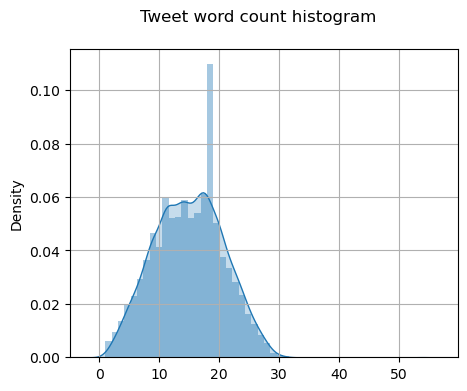

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
model2_train_df['Tweet_word_count'] = model2_train_df['text'].apply(lambda x: len(x.split(" ")) )
sns.distplot(model2_train_df['Tweet_word_count'].values, hist=True, kde=True, kde_kws={"shade": True})

plt.grid()
plt.suptitle("Tweet word count histogram")
plt.show()

In [44]:
model2_train_df = model2_train_df[model2_train_df.Tweet_word_count < 31]

model2_train_df = model2_train_df[model2_train_df.Tweet_word_count > 1]

model2_train_df.sort_values(by=['Tweet_word_count'])

,id,keyword,text,target,Tweet_word_count
321,467,armageddon,Armageddon https://t.co/uCSUDk3q1d,1,2
28,40,unknown,Cooool :),0,2
30,44,unknown,The end!,0,2
3883,5521,flattened,Flattened https://t.co/9jCIBenckz,0,2
7567,10817,wrecked,Wrecked emotions.,0,2
...,...,...,...,...,...
6794,9733,tragedy,This is a tragedy: I added the wrong book to m...,0,30
1947,2799,curfew,In the beginning of summer my mom made my curf...,0,30
7220,10339,weapons,I'm sorry but if you have to resort to weapons...,1,30
3859,5489,flames,I chose you so if we can search for the joy of...,0,30


## Model 3

First, we load the needed libraries and load the data

In [15]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

# restrict the movie reviews to the top 20,000 most common words
max_features = 20000
# cut off the reviews after only 80 words
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32
print('Loading data...')

(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words = max_features)
print(len(x_train_imdb), 'train sequences')
print(len(x_test_imdb), 'test sequences')
print('Pad sequences(samples x time)' )

Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences(samples x time)


In [16]:
print("X_train_type:")
print(type(x_train_imdb))
print("Y_train_type")
print(type(y_train_imdb))
print("X_test_type")
print(type(x_test_imdb))
print("Y_test_type")
print(type(y_test_imdb))

X_train_type:
<class 'numpy.ndarray'>
Y_train_type
<class 'numpy.ndarray'>
X_test_type
<class 'numpy.ndarray'>
Y_test_type
<class 'numpy.ndarray'>


In [19]:
print(x_train_imdb)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 

In [20]:
print(y_train_imdb)

[1 0 0 ... 0 1 0]


In [26]:
from keras import utils
x_train_imdb = utils.pad_sequences(x_train_imdb, maxlen = maxlen)
x_testimdb = utils.pad_sequences(x_test_imdb, maxlen = maxlen)
print('x_train_imdb shape:', x_train_imdb.shape)
print('x_test_imdb shape:', x_test_imdb.shape)
print('Build model...')

x_train_imdb shape: (25000, 80)
x_test_imdb shape: (25000,)
Build model...


In [27]:
print("X_train_type:")
print(type(x_train_imdb))
print("Y_train_type")
print(type(y_train_imdb))
print("X_test_type")
print(type(x_test_imdb))
print("Y_test_type")
print(type(y_test_imdb))

X_train_type:
<class 'numpy.ndarray'>
Y_train_type
<class 'numpy.ndarray'>
X_test_type
<class 'numpy.ndarray'>
Y_test_type
<class 'numpy.ndarray'>


In [31]:
print(type(disaster_testing_data['text']))

<class 'pandas.core.series.Series'>


In [30]:
disaster_testing_data

,id,keyword,location,text
0,0,unknown,unknown,Just happened a terrible car crash unknown unk...
1,2,unknown,unknown,"Heard about #earthquake is different cities, s..."
2,3,unknown,unknown,"there is a forest fire at spot pond, geese are..."
3,9,unknown,unknown,Apocalypse lighting. #Spokane #wildfires unkno...
4,11,unknown,unknown,Typhoon Soudelor kills 28 in China and Taiwan ...
...,...,...,...,...
3258,10861,unknown,unknown,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,unknown,unknown,Storm in RI worse than last hurricane. My city...
3260,10868,unknown,unknown,Green Line derailment in Chicago http://t.co/U...
3261,10874,unknown,unknown,MEG issues Hazardous Weather Outlook (HWO) htt...


# Start of Model 3 For Real

We must load the libraries that will be needed for the model

In [ ]:
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

We must pre-process the disaster tweet data to prepare it for the LSTM model

Next, we apply padding to the predictive data sequences

Now we define, compile, and fit the LSTM model

Having defined the model, we apply the model to the validation dataset, so that we can assess predictive performance measures and construct precision-recall and receiving operating characteristic (ROC) curves.

In [ ]:
# Apply the cnn model1 to the training / validation dataset
cnn_pred3_validation = best_model.predict(validation_generator, verbose = 1)

# Put the label predictions into a dataframe
cnn_pred3_validation_df = pd.DataFrame(cnn_pred3_validation, columns=['label'])

cnn_pred3_validation_array = cnn_pred3_validation_df['label'].to_numpy()

from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve

true_y = validation_generator.labels


# Curves

fpr, tpr, _ = roc_curve(true_y, cnn_pred3_validation_array)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('ROC Curve')
# roc auc score
auc1 = roc_auc_score(true_y, cnn_pred3_validation_array)
print("The roc auc score is:", auc1)

prec, recall, _ = precision_recall_curve(true_y, cnn_pred3_validation_array)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.title('Precision-Recall Curve')# precision-recall auc score
auc2 = auc(recall, prec)
print("The prec-recall auc score is:", auc2)

Now we apply the model to the test dataset

In [ ]:
# Apply the cnn model1 to the test dataset
#rnn_lstm_pred3 = best_model.predict(test_generator, verbose = 1)

Now we save the test dataset predictions to a CSV for submission into Kaggle

In [ ]:
# Put the label predictions into a dataframe
rnn_lstm_pred3_df = pd.DataFrame(rnn_lstm_pred3, columns=['target'])

# Add the ID column to the front of the cnn predictions dataframe
rnn_lstm_pred3_df.insert(0, 'id', disaster_testing_data['id'])

# Output predictions to csv
rnn_lstm_pred3_df.to_csv('test_predictions_rnn_lstm_v3.csv', index=False)

Having submitted our predicitons into Kaggle, we now display the score obtained

In [ ]:
# Display the kaggle results 
import matplotlib.pyplot as plt
plt.figure(figsize = (15, 15))
kaggle_results = plt.imread('Kaggle_results_rnn_lstm_v3.jpg')
plt.imshow(kaggle_results)
plt.axis("off")
plt.show()